**Importing Genius lyrics for any artist's album to find some of the most commonly used words**

Includes features and ad-libs

*(Draft)*

In [1]:
import lyricsgenius as lg

import re
import datascience as ds
from datascience import Table
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter

from PIL import Image
import requests
from io import BytesIO

import warnings
from unidecode import unidecode
warnings.filterwarnings('ignore')

import seaborn as sns

A Genius client access token is needed for this code to run:

In [2]:
client_access_token = ''

In this notebook I will set verbose = False to prevent search results from printing:

In [3]:
genius = lg.Genius(client_access_token, skip_non_songs=False, remove_section_headers=True, verbose=False)

In [4]:
name = input("Enter artist's name: ")
album_name = input("Enter album title: ")

Enter artist's name: Jimi Hendrix
Enter album title: Axis: Bold As Love


In [5]:
artist = genius.search_artist(name, max_songs=1, sort='popularity')

In [6]:
album = genius.search_album(album_name, artist.name)
album_dict = genius.search_albums(album_name, per_page = 1)

In [7]:
album_id = album_dict.get('sections')[0].get('hits')[0].get('result').get('id')

In [8]:
album_info = genius.album_tracks(str(album_id)).get('tracks')

for tracks in album_info:
    track_count = tracks.get('number')
num_tracks = list(range(track_count))

track_names = []

for n in num_tracks:
    track_names.append(album_info[n]['song']['title'])

50 frequently used English words (courtesy of smart-words.org):

In [9]:
common_words_50 = ['the','of','to','and','a','in','is','it',
                'you','that','he','was','for','on','are',
                'with','as','i','his','they','be','at',
                'one','have','this','from','or','had','by',
                'not','word','but','what','some','we','can',
                'out','other','were','all','there','when','up',
                'use','your','how','said','an','each','she']

other_common_words = ['me', 'my', "i'm", 'like', 'yeah', "it's"]

common_words = common_words_50 + other_common_words

In [10]:
def top_words(album, num_words):
    
    global common_words
    
    removelist = "'"
    unique_lyrics = []
    all_lyrics = []
    
    for i in range(len(album)):
       
        i += 0 
        
        song = artist.song(album[0+i])
        lyrics = song.lyrics

        lyrics = lyrics.replace('\n', ' ')
        lyrics = re.sub(r"[0-9]*EmbedShare URLCopyEmbedCopy", '', lyrics)
        lyrics = unidecode(lyrics)
        lyrics = re.sub(r'[^\w'+removelist+']', ' ', lyrics)
        lyrics = re.sub('  ', ' ', lyrics)
        lyrics = re.split('\s+', lyrics)
        lyrics = sorted(lyrics)
        
        for i in lyrics:
            all_lyrics.append(i.lower())
            if i not in unique_lyrics:
                unique_lyrics.append(i)
    
    all_not_in_most_common = [x for x in all_lyrics if x not in common_words]
    counts_dict = dict(Counter(all_not_in_most_common))
    counts_list =list(counts_dict.items())
    
    # ----------------------------------------------------------------------
   
    l=len(counts_list)
    for i in range(l-1):
        for j in range(i+1,l):
            if counts_list[i][1]<counts_list[j][1]:
                t=counts_list[i]
                counts_list[i]=counts_list[j]
                counts_list[j]=t
        sortdict=dict(counts_list)
    
    sortdict_items = sortdict.items()
    tuple_list = list(sortdict_items)[:num_words]
    
    top_n_words = []
    top_n_counts = []
    
    for i in tuple_list:
        top_n_words.append(i[0])
        top_n_counts.append(i[1])
        
    # ----------------------------------------------------------------------
    
    sns.set_style("darkgrid")
    c = plt.get_cmap('Reds')
    rescale = lambda top_n_counts: ((top_n_counts - np.min(top_n_counts)) / 
    (np.max(top_n_counts) - np.min(top_n_counts)))
    
    word_bar_plot = plt.bar(top_n_words, top_n_counts, color = c(rescale(top_n_counts)))
    
    plt.title('Word Count: '+str(album_name)+' by '+str(artist.name), fontsize = 24)
    plt.ylabel('Count', fontsize = 16); plt.xlabel('Words', fontsize = 16)
    plt.xticks(rotation=45, fontsize = 12)
    fig = plt.gcf().set_size_inches(14, 10)
    
    return fig

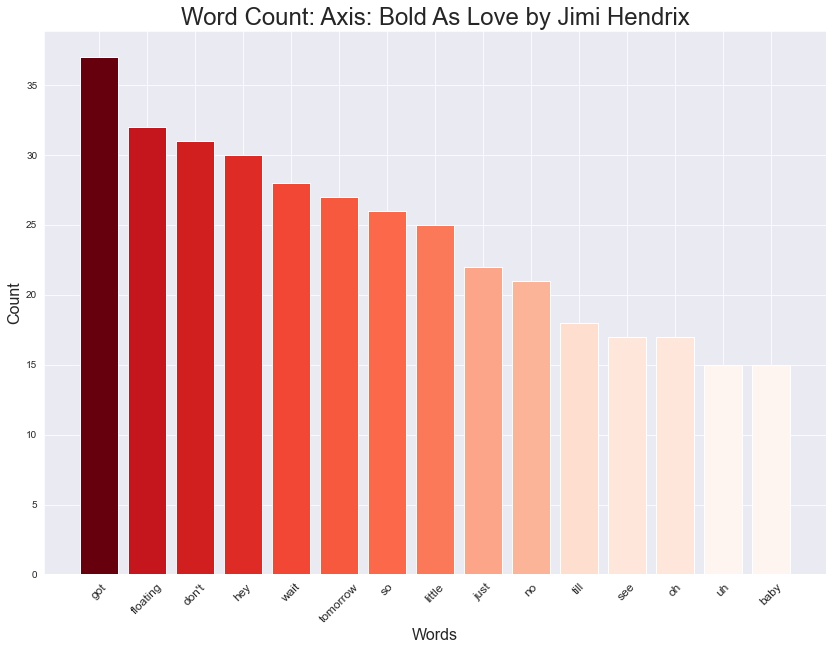

In [11]:
top_words(track_names, 15)

Show album art (optional):

Cover Art: 


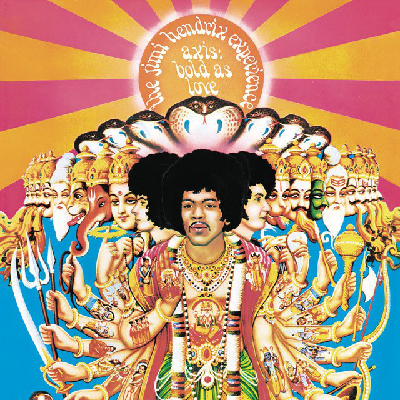

In [12]:
print('Cover Art: ')
im = Image.open(requests.get(album.cover_art_url, stream=True).raw)
im.resize((400,400))